The standard form for a QP in `cvxopt` notation is:

\begin{align*}
        \min_{x}  \tfrac{1}{2} x^T P x &+ q^T x \\
        \text{such that   }\quad  Gx &\preceq h\\
        Ax & = b
\end{align*}
where $Gx \preceq h$ means that the inequality is taken element-wise for each row of $Gx$ and $h$.

In `cvxopt` the QP is defined by the parameters $P, q, G, h, A$ and $b$.  The matrix $P$ and the vector $q$ must be specified, but the others are optional.   Note that all optimisations must be manipulated to be of this form.

In [2]:
import numpy as np 
from scipy.stats import norm as norm
import matplotlib.pyplot as plt
from cvxopt import solvers, matrix
from time import time

In [3]:
sigma = 1

ys_pos = np.random.uniform(0, 10, 15)
xs_pos = ys_pos + np.ones(ys_pos.shape) + norm.rvs(0, sigma, size=ys_pos.shape)

ys_neg = np.random.uniform(0, 10, 15)
xs_neg = ys_neg - np.ones(ys_neg.shape) + norm.rvs(0, sigma, size=ys_neg.shape)

In [4]:
pos = np.hstack((ys_pos.reshape(-1, 1), xs_pos.reshape(-1, 1)))
neg = np.hstack((ys_neg.reshape(-1, 1), xs_neg.reshape(-1, 1)))
t = np.append(np.ones(pos.shape[0]), -1 * np.ones(pos.shape[0])).reshape(-1, 1)
X = np.vstack((pos, neg))

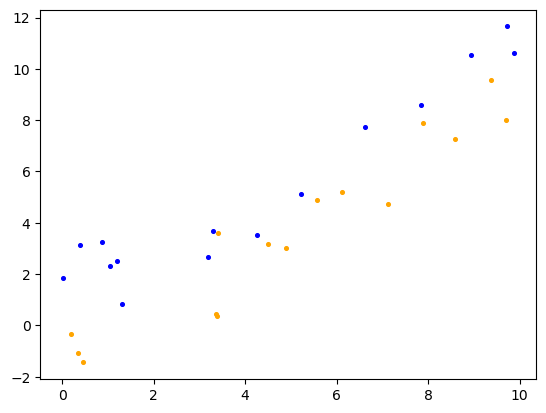

In [5]:
plt.scatter(ys_pos, xs_pos, color='blue', s=7)
plt.scatter(ys_neg, xs_neg, color='orange', s=7)
plt.show()

In [6]:
#Regularisation parameter
C = 1

In [7]:
P = matrix(np.array([[np.dot(X[i], X[j]) * t[i][0] * t[j][0] for i in range(X.shape[0])] for j in range(X.shape[0])]), tc='d')
q = matrix(np.full(X.shape[0], -1), tc='d')
G = matrix(np.vstack((np.diag(-1 * np.ones(X.shape[0])), np.diag(np.ones(X.shape[0])))), tc='d')
h = matrix(np.vstack((np.zeros((X.shape[0], 1)), C * np.ones((X.shape[0], 1)))), tc='d')
A = matrix(t.reshape(1, -1), tc='d')
b = matrix(np.array([0]), tc='d')

In [8]:
sol = solvers.qp(P, q, G, h, A, b)

     pcost       dcost       gap    pres   dres
 0: -1.3405e+01 -5.7734e+01  2e+02  2e+00  5e-14
 1: -9.3848e+00 -3.4668e+01  3e+01  2e-01  5e-14
 2: -1.0239e+01 -1.3683e+01  4e+00  2e-02  5e-14
 3: -1.1533e+01 -1.2263e+01  8e-01  3e-03  6e-14
 4: -1.1770e+01 -1.1969e+01  2e-01  6e-04  3e-14
 5: -1.1865e+01 -1.1874e+01  1e-02  2e-05  3e-14
 6: -1.1870e+01 -1.1870e+01  1e-04  2e-07  3e-14
 7: -1.1870e+01 -1.1870e+01  1e-06  2e-09  5e-14
Optimal solution found.


In [9]:
from SVM_functions import get_linear_discriminant

alphas = np.array(sol['x'])
w, b = get_linear_discriminant(X, t, alphas, C)

In [10]:
w_norm = np.array([w[1], -w[0]])

In [21]:
point = w_norm * 10
xs_discr = np.array([0, point[0]]) + b
ys_discr = np.array([b, point[1]])
point

array([10.99672457, 11.52195039])

In [28]:
sizes = 7 * np.ones(alphas.shape)
sizes[(alphas - C) < 1e-4 ] = 20
sizes[alphas < 1e-4] = 4

In [30]:
sizes

array([[ 4.],
       [20.],
       [ 4.],
       [20.],
       [20.],
       [ 4.],
       [ 4.],
       [20.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [20.],
       [20.],
       [20.],
       [ 4.],
       [20.],
       [ 4.],
       [20.],
       [ 4.],
       [ 4.],
       [20.],
       [ 4.],
       [20.],
       [ 4.],
       [ 4.],
       [20.],
       [20.],
       [20.],
       [ 4.]])

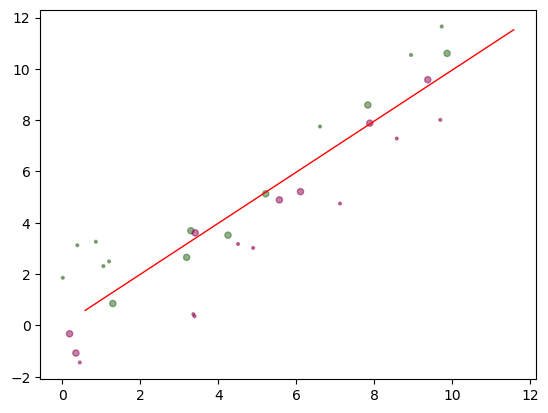

In [29]:
c = np.array(sol['x'])

pc = plt.scatter(X[:, 0], X[:, 1], c=t, cmap='PiYG', s=sizes, alpha=0.5)
plt.plot(xs_discr, ys_discr, color='red', linewidth=1)
#cbar = plt.colorbar(pc)
plt.show()